<a href="https://colab.research.google.com/github/plaban1981/Vision_Transformer_Model/blob/main/Image_Captioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -qU transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 98.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 18.3 MB/s eta 0:00:00


In [3]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image

In [5]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
#
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [8]:
import os
os.mkdir("/content/model_files")

In [4]:
max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

In [5]:
!wget "https://ipt.imgix.net/206124/x/0/leonardopapera-formats-2.jpg"

--2023-04-21 06:37:10--  https://ipt.imgix.net/206124/x/0/leonardopapera-formats-2.jpg
Resolving ipt.imgix.net (ipt.imgix.net)... 199.232.150.208, 2a04:4e42:65::720
Connecting to ipt.imgix.net (ipt.imgix.net)|199.232.150.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180127 (176K) [image/jpeg]
Saving to: ‘leonardopapera-formats-2.jpg’

leonardopapera-form 100%[===================>] 175.91K  --.-KB/s    in 0.008s  

2023-04-21 06:37:12 (21.4 MB/s) - ‘leonardopapera-formats-2.jpg’ saved [180127/180127]



In [6]:
predict_step(['/content/leonardopapera-formats-2.jpg'])

['a black and white bird sitting on top of a rock']

In [7]:
import transformers
transformers.__version__

'4.28.1'

In [8]:
torch.__version__

'2.0.0+cu118'

In [28]:
import PIL
PIL.__version__

'8.4.0'

## Inference Script

In [27]:
#
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image
import os
import json
import requests

#
def preprocess_function(image_path, content_type=None):
  #'''
  with open(image_path,"r",encoding='utf-8') as f:
    data = f.read()
  print(data)
    #'''
    #data = image_path.read().decode('utf-8')
  image_paths = data.split(";")
  return image_paths

#
#
def predict_function(image_paths, model):
  print(image_paths)
  images = []
  max_length = 16
  num_beams = 4
  gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
  for image_path in image_paths:
    print(image_path)
    if len(image_path) > 10:
      i_image = Image.open(requests.get(image_path.strip(), stream=True).raw)
    #i_image = Image.open(image_path)
      if i_image.mode != "RGB":
         i_image = i_image.convert(mode="RGB")

      images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

#
def model_load_function(model_path):
    model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
    feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
    tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
    #
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    return model


#
def postprocess_function(predictions, content_type=None):
  return json.dumps({"response": predictions})


#"""
if __name__ == '__main__':
    audio_path = "input.txt"
    data= preprocess_function(audio_path)
    model_path = "./model_files"
    path = model_load_function(model_path)
    predictions = predict_function(data,path)
    out = postprocess_function(predictions)
    print(out)
#"""

https://ipt.imgix.net/206124/x/0/leonardopapera-formats-2.jpg;https://wallpaperaccess.com/full/4958480.jpg

['https://ipt.imgix.net/206124/x/0/leonardopapera-formats-2.jpg', 'https://wallpaperaccess.com/full/4958480.jpg\n']
https://ipt.imgix.net/206124/x/0/leonardopapera-formats-2.jpg
https://wallpaperaccess.com/full/4958480.jpg

{"response": ["a black and white bird sitting on top of a rock", "a tree in the middle of a field with a sky background"]}


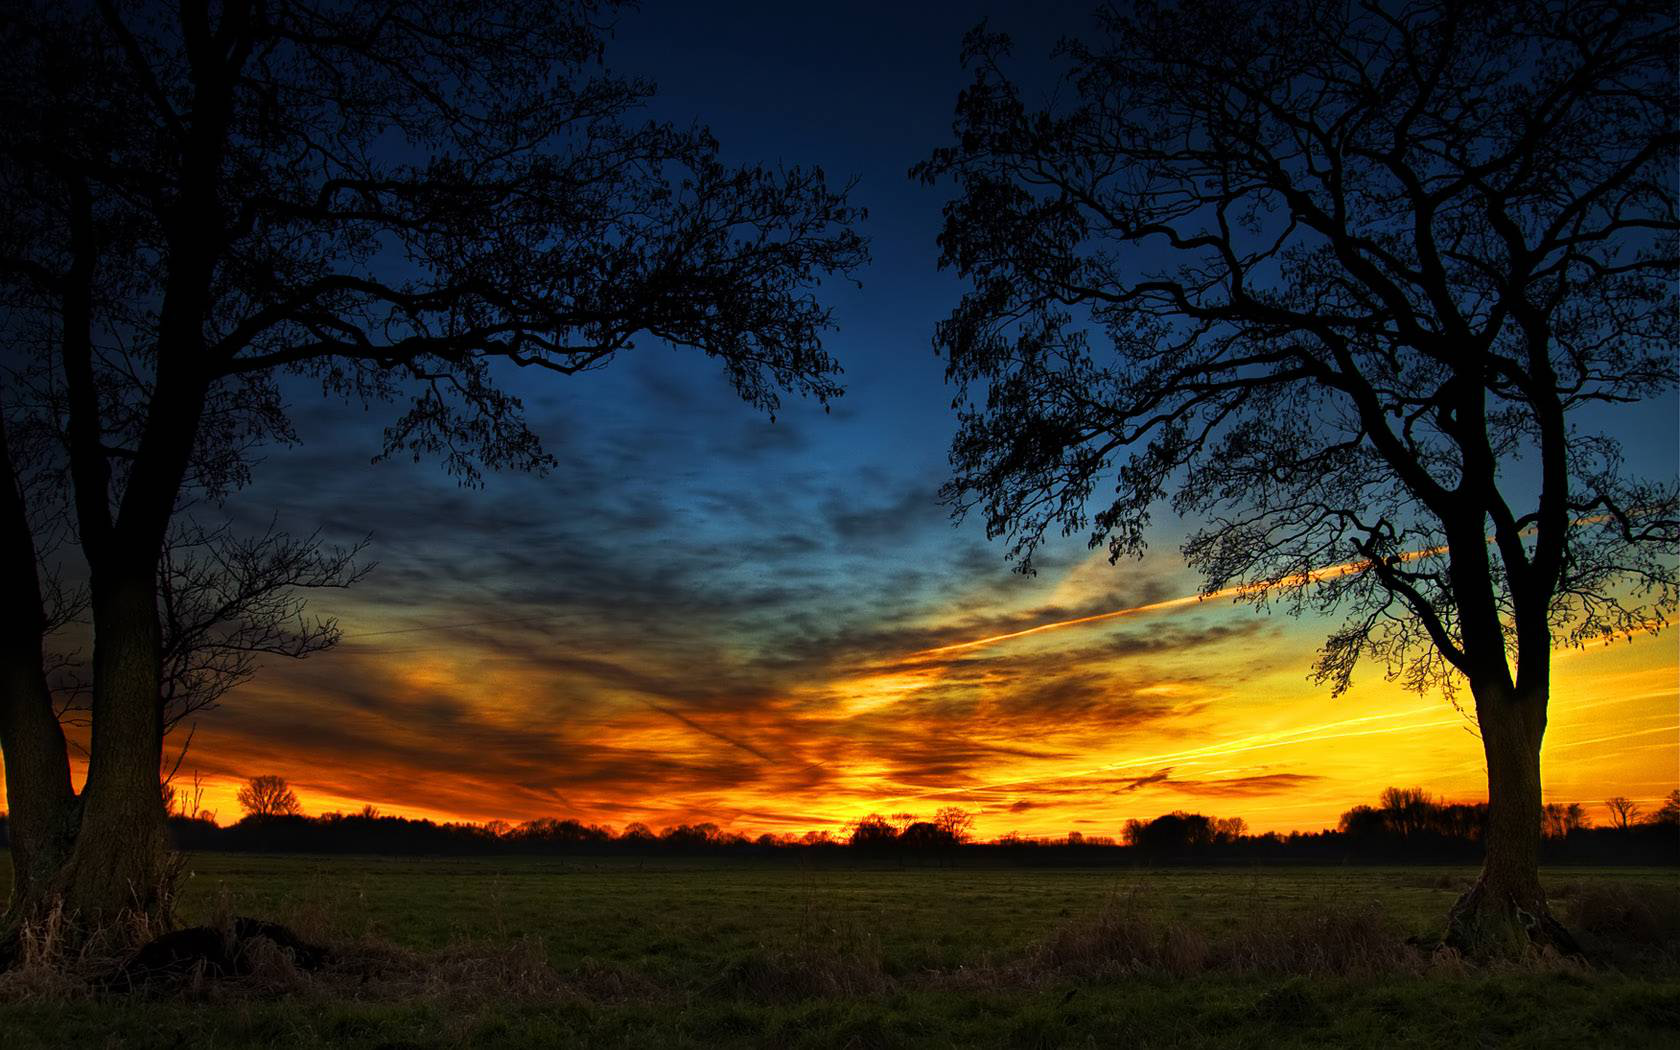

In [24]:
Image.open(requests.get("https://wallpaperaccess.com/full/4958480.jpg", stream=True).raw)

## Write Input file

In [22]:
%%writefile input.txt
https://ipt.imgix.net/206124/x/0/leonardopapera-formats-2.jpg;https://wallpaperaccess.com/full/4958480.jpg

Overwriting input.txt
